<a href="https://colab.research.google.com/github/yannidd/analog-electronics-nn/blob/master/python/notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install --upgrade plotly

     |████████████████████████████████| 6.8MB 3.4MB/s 
  Found existing installation: plotly 3.6.1
    Uninstalling plotly-3.6.1:
      Successfully uninstalled plotly-3.6.1


In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
import plotly.graph_objects as go

from mpl_toolkits.mplot3d import axes3d
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

# Simple MLP trained on the XOR problem

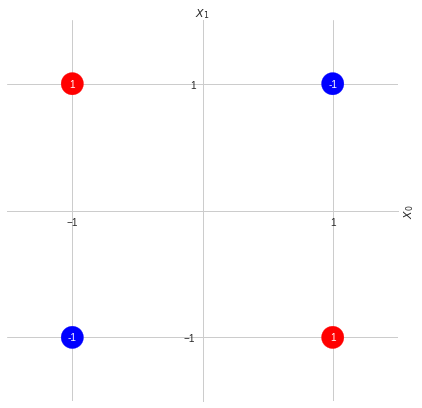

In [52]:
x = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y = np.array([-1, 1, 1, -1])

plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(x[:, 0], x[:, 1], c=y, cmap='bwr', s=500)
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(-1.5, 1.5)
plt.yticks([-1, 1])
plt.xticks([-1, 1])
ax.set_ylabel(f'$X_0$')
ax.set_xlabel(f'$X_1$')
ax.xaxis.set_label_position('top')
ax.yaxis.set_label_position('right')

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

for i, txt in enumerate(y):
  ax.annotate(txt, (x[i, 0], x[i, 1]), ha='center', va='center', color='w')

In [0]:
def accuracy(y_true, y_pred):
  return K.abs(y_true - y_pred) < 0.1

model = Sequential()

model.add(Dense(2, activation='tanh', input_shape=(2,)))
model.add(Dense(1, activation='tanh'))

model.compile(optimizer=SGD(lr=0.1),
              loss='mse',
              metrics=[accuracy])

# model.summary()

Truth table for Q = A XOR B:  

|A|B|Q|
|-|-|-|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

In [0]:
model.fit(x, y, batch_size=4, epochs=500, verbose=0)

In [0]:
a = b = np.arange(-1.5, 1.5, 0.1)
A, B = np.meshgrid(a, b)
Q = np.array(np.split(model.predict(np.array(list(zip(A.flatten(), B.flatten())))).flatten(), len(a)))

In [0]:
for layer in model.layers:
  print('Weights for layer \'{}\' ({} unit(s)):'.format(layer.name, layer.units))
  weights = layer.get_weights() 
  print(' - Kernel: {}\n - Bias: {}\n'.format(weights[0], weights[1]))

Weights for layer 'dense' (2 unit(s)):
 - Kernel: [[ 1.353486   1.4366068]
 [-1.3533528 -1.4364339]]
 - Bias: [ 1.1832211 -1.2878091]

Weights for layer 'dense_1' (1 unit(s)):
 - Kernel: [[ 2.0381267]
 [-2.0300384]]
 - Bias: [-1.724663]



In [0]:
fig = go.Figure(
    data=[
          go.Surface(x=A, 
                     y=B, 
                     z=Q,
                     hidesurface=True,
                     cmin=-1,
                     cmax=1,
                     contours=dict(
                         x=dict(show=True, size=0.1, start=-1.5, end=1.5, usecolormap=True), 
                         y=dict(show=True, size=0.1, start=-1.5, end=1.5, usecolormap=True),
                         ),
                     ), 
          go.Scatter3d(
              x=[-1, -1, 1, 1], 
              y=[-1, 1, -1, 1], 
              z=[1, -1, -1, 1],
              mode='markers')])

fig.update_layout(title='MLP', autosize=False,
                  width=1000, height=600,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()